In [1]:
import pandas as pd 
df=pd.read_csv("Iris_extended.csv")

In [2]:
df.shape

(2000, 5)

In [3]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  2000 non-null   float64
 1   SepalWidthCm   2000 non-null   float64
 2   PetalLengthCm  2000 non-null   float64
 3   PetalWidthCm   2000 non-null   float64
 4   Species        2000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 78.3+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,2000.000000,2000.000000,2000.000000,2000.00000
mean,5.840450,3.056400,3.735600,1.18545
std,0.834426,0.429618,1.785754,0.77341
min,4.300000,2.000000,1.000000,0.10000
25%,5.100000,2.800000,1.500000,0.20000
50%,5.800000,3.000000,4.200000,1.30000
75%,6.400000,3.400000,5.100000,1.80000
max,7.900000,4.400000,6.900000,2.50000


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(1853)

In [8]:
import pandas as pd
from imblearn.over_sampling import SMOTE


df = pd.read_csv("Iris_extended.csv")



X = df.drop("Species", axis=1)
y = df["Species"]


smote = SMOTE(sampling_strategy="auto", random_state=42)
X_res, y_res = smote.fit_resample(X, y)


df_smote = pd.concat([X_res, y_res], axis=1)


if len(df_smote) >= 2000:
    df_smote = df_smote.sample(n=2000, random_state=42)
else:
    df_smote = df_smote.sample(n=2000, replace=True, random_state=42)


df_smote.to_csv("Iris_extended_SMOTE.csv", index=False)

print("Extended dataset shape:", df_smote.shape)


Extended dataset shape: (2000, 5)


In [9]:
print(df["Species"].value_counts())

Species
Iris-setosa        689
Iris-virginica     677
Iris-versicolor    634
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91958\AppData\Local\Temp\ipykernel_31356\2376270351.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Species", data=df, palette="Set2")


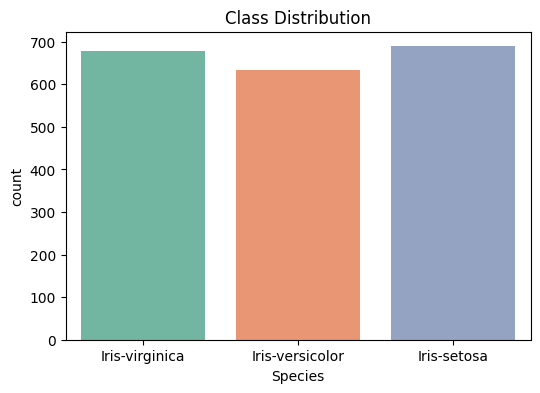

In [11]:

plt.figure(figsize=(6,4))
sns.countplot(x="Species", data=df, palette="Set2")
plt.title("Class Distribution")
plt.show()

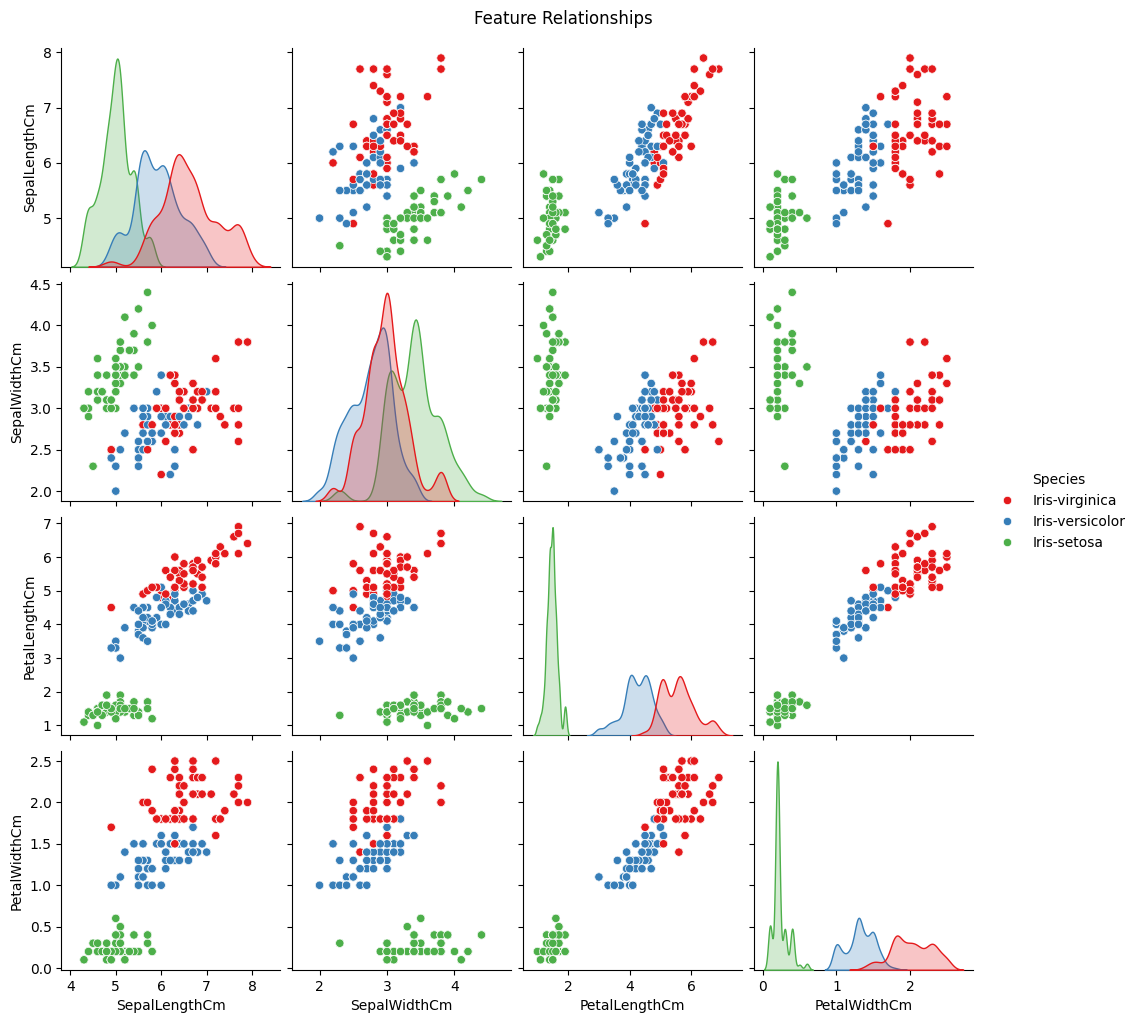

In [12]:
sns.pairplot(df, hue="Species", palette="Set1", diag_kind="kde")
plt.suptitle("Feature Relationships", y=1.02)
plt.show()

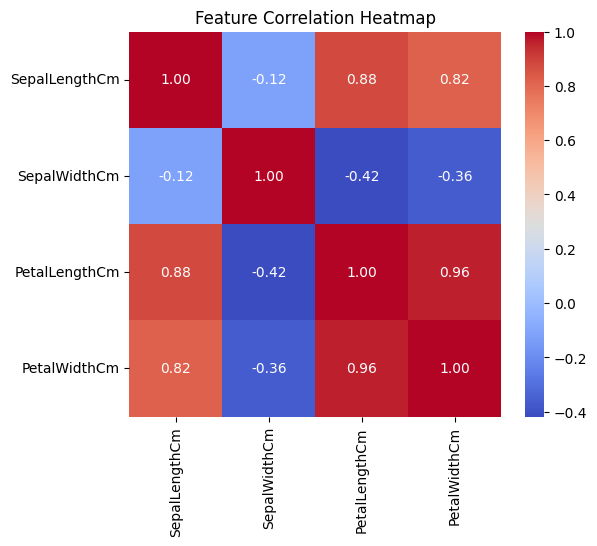

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(df.drop("Species", axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\91958\AppData\Local\Temp\ipykernel_31356\1687794131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=col, data=df, palette="Set2")
C:\Users\91958\AppData\Local\Temp\ipykernel_31356\1687794131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=col, data=df, palette="Set2")
C:\Users\91958\AppData\Local\Temp\ipykernel_31356\1687794131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Species", y=col, data=df, palette="Set2")
C:\Users\91958\AppData\Local\Temp\ipykernel_31356\1687794131.py:4: Future

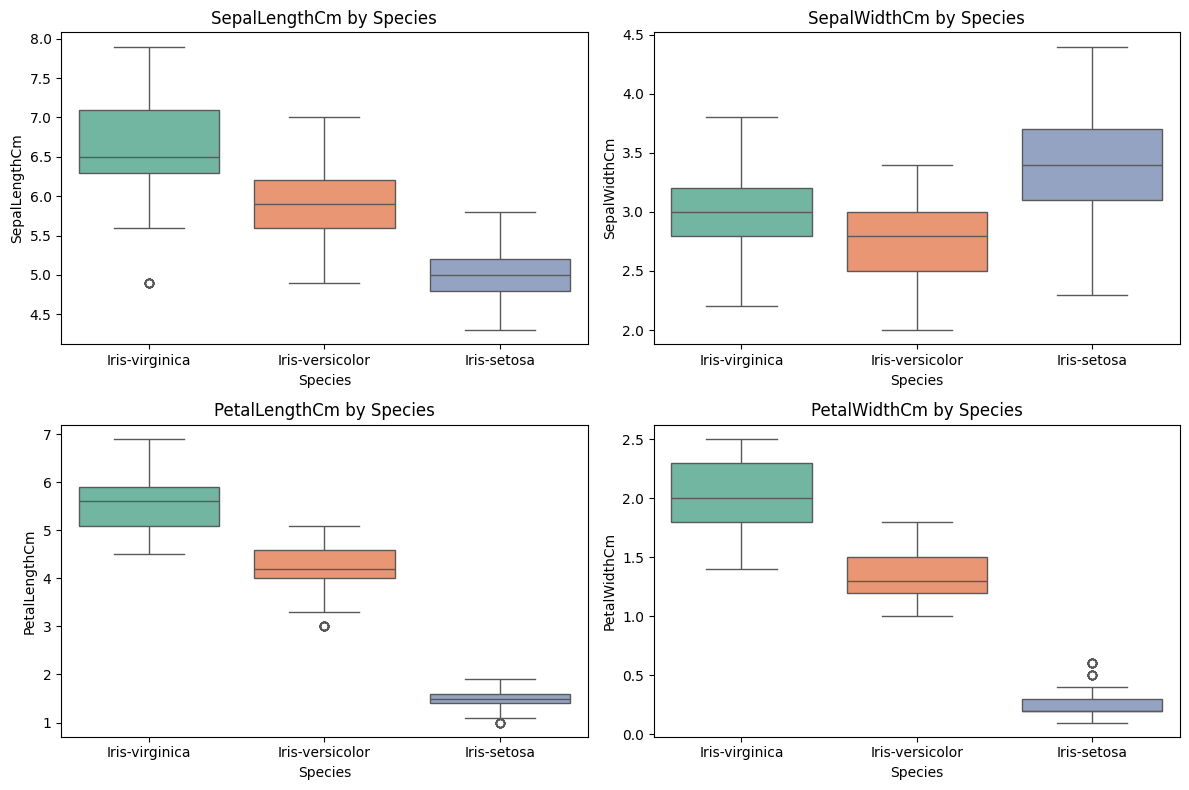

In [14]:
plt.figure(figsize=(12,8))
for i, col in enumerate(["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x="Species", y=col, data=df, palette="Set2")
    plt.title(f"{col} by Species")
plt.tight_layout()
plt.show()

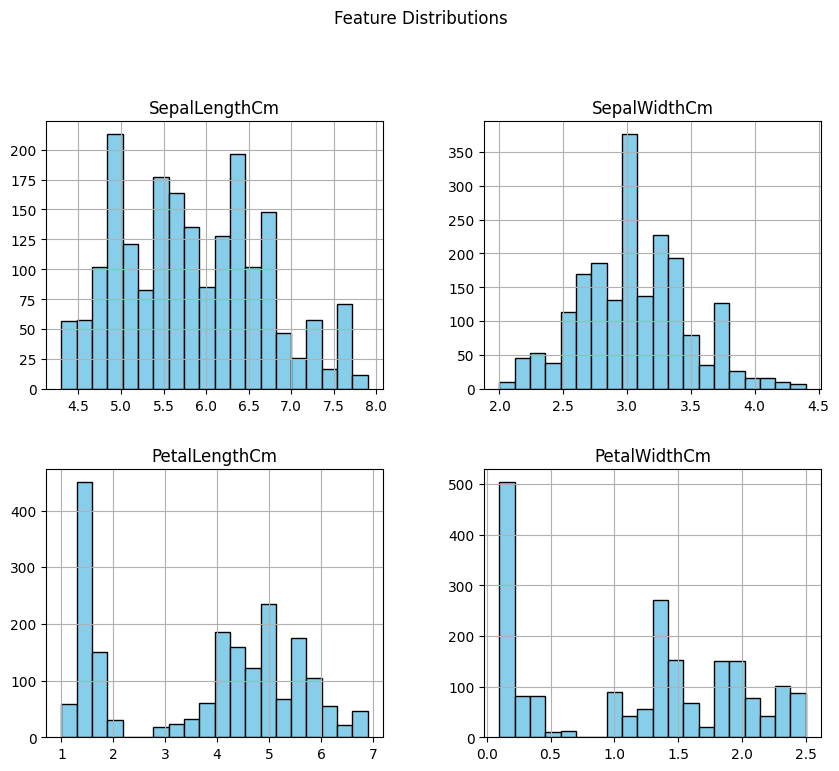

In [15]:
df.drop("Species", axis=1).hist(figsize=(10,8), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distributions", y=1.02)
plt.show()

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv("Iris_extended_SMOTE.csv")
y = df[['Species']]  

encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)
y_encoded_df = pd.DataFrame(y_encoded, columns=encoder.get_feature_names_out(['Species']))
print(y_encoded_df.head())


   Species_Iris-setosa  Species_Iris-versicolor  Species_Iris-virginica
0                  0.0                      0.0                     1.0
1                  0.0                      0.0                     1.0
2                  1.0                      0.0                     0.0
3                  0.0                      1.0                     0.0
4                  0.0                      1.0                     0.0


In [17]:
X = df.drop('Species', axis=1)  
y = y_encoded_df 

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))


model.add(Dense(12, activation='relu'))


model.add(Dense(y_train.shape[1], activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


d:\iris species\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5352 - loss: 0.9865 - val_accuracy: 0.7281 - val_loss: 0.7835
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8008 - loss: 0.6643 - val_accuracy: 0.8469 - val_loss: 0.5622
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8602 - loss: 0.4738 - val_accuracy: 0.8562 - val_loss: 0.4059
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8805 - loss: 0.3461 - val_accuracy: 0.9000 - val_loss: 0.3089
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9320 - loss: 0.2681 - val_accuracy: 0.9187 - val_loss: 0.2492
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9570 - loss: 0.2109 - val_accuracy: 0.9406 - val_loss: 0.1963
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9641 - loss: 0.1644 - val_accuracy: 0.9406 - val_loss: 0.1584
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9633 - loss: 0.1299 - val_accuracy: 0.9406 - val_loss

In [21]:

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9750 - loss: 0.0334  
Test Accuracy: 97.50%


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # Dropout 20% of neurons


model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2
)


d:\iris species\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.3930 - loss: 1.0766 - val_accuracy: 0.7469 - val_loss: 0.9080
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7406 - loss: 0.7548 - val_accuracy: 0.8438 - val_loss: 0.5542
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8188 - loss: 0.5186 - val_accuracy: 0.8313 - val_loss: 0.3947
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8328 - loss: 0.4190 - val_accuracy: 0.8469 - val_loss: 0.3265
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8695 - loss: 0.3526 - val_accuracy: 0.8969 - val_loss: 0.2836
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8664 - loss: 0.3254 - val_accuracy: 0.9062 - val_loss: 0.2515
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8930 - loss: 0.2808 - val_accuracy: 0.9187 - val_loss: 0.2182
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9133 - loss: 0.2677 - val_accuracy: 0.9094 - val_loss:

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9750 - loss: 0.0465  
Test Accuracy: 97.50%


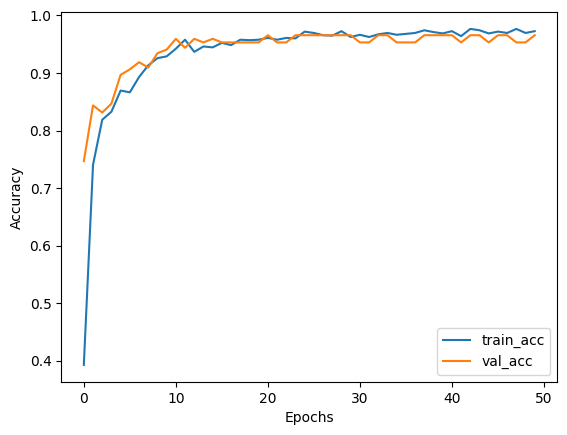

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test.values, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
print(cm)

print(classification_report(y_true_classes, y_pred_classes))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
[[138   0   0]
 [  0 123   5]
 [  0   5 129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       0.96      0.96      0.96       128
           2       0.96      0.96      0.96       134

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



In [26]:

model.save("Iris_ANN_SMOTE.h5")
print("Model saved successfully!")


Model saved successfully!
